In [1]:
import numpy as np
from sif.models import HeteroscedasticGaussianProcess, GaussianProcess
from sif.kernels import SquaredExponentialKernel

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In this tutorial we'll be considering the problem of heteroscedastic noise. This occurs when the noise of an underlying process is not uniform over all regions of the input space. Indeed, it may be the case that there is a non-stationary function that is controlling the noise-level of the process at various inputs. We proceed by defining two true latent functions, one which controls the noise level and the other that controls the underlying signal.

In [3]:
def signal_function(X):
    return np.ravel(np.sin(X) * np.cos(X) * X ** 2)

In [4]:
def noise_function(X):
    return np.ravel(np.sin(10*X)**2 * (X / 2)**2)

Now we'll create some synthetic data and visualize the process and the noise function.

In [5]:
X = np.atleast_2d(np.linspace(0., 2*np.pi, num=1000)).T
X_pred = np.atleast_2d(np.linspace(0., 2*np.pi, num=1000)).T
f = signal_function(X)
y = np.random.normal(f, noise_function(X))

Now we create the kernels for the heteroscedastic Gaussian process. This means we have to define the length scale and two kernels which model the expectation and noise processes. Notice that these kernels share the same length scale.

In [6]:
mean_kernel = SquaredExponentialKernel(np.array([1., ]))
noise_kernel = SquaredExponentialKernel(np.array([0.2, ]))

In [7]:
gp = HeteroscedasticGaussianProcess(mean_kernel, noise_kernel)
gp.fit(X, y)

Heteroscedastic Gaussian process iteration: 0. Log-likelihood: -3225.6717
Heteroscedastic Gaussian process iteration: 1. Log-likelihood: -1490.5335
Heteroscedastic Gaussian process iteration: 2. Log-likelihood: -1164.6586
Heteroscedastic Gaussian process iteration: 3. Log-likelihood: -1056.3575
Heteroscedastic Gaussian process iteration: 4. Log-likelihood: -1009.9215
Heteroscedastic Gaussian process iteration: 5. Log-likelihood: -986.8697
Heteroscedastic Gaussian process iteration: 6. Log-likelihood: -975.7966


Now we use the heteroscedastic Gaussian process posterior to characterize uncertainty.

In [8]:
gp_mean, gp_cov = gp.predict(X_pred)
gp_std = np.sqrt(np.diag(gp_cov))

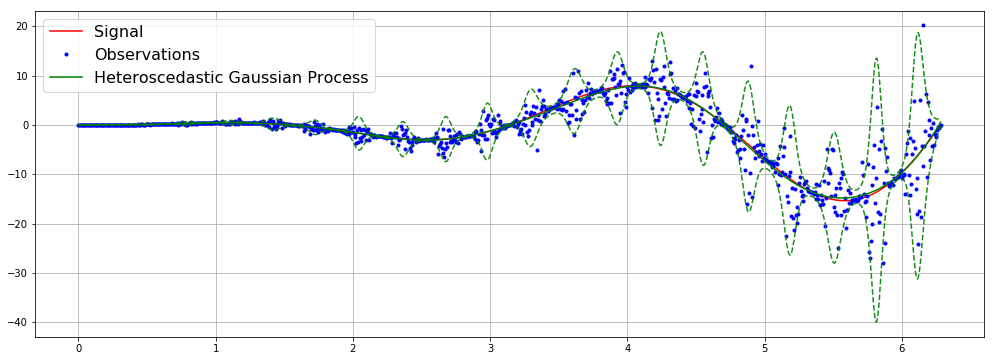

In [9]:
plt.figure(figsize=(17, 6))
plt.plot(X_pred.ravel(), signal_function(X_pred), "r-", label="Signal")
plt.plot(X.ravel(), y, "b.", label="Observations")
plt.plot(X_pred.ravel(), gp_mean, "g-", label="Heteroscedastic Gaussian Process")
plt.plot(X_pred.ravel(), gp_mean + 1.96*gp_std, "g--", alpha=0.9)
plt.plot(X_pred.ravel(), gp_mean - 1.96*gp_std, "g--", alpha=0.9)
plt.grid()
plt.legend(fontsize=16)
plt.show()